# Assignment 1

## Statement of Problem

Solve the two dimensional Laplace's equation of the following form using the finite element method:

\begin{equation}
\epsilon_{xj}\frac{\partial^2\phi(x,y)}{\partial x^2} + \epsilon_{yj}\frac{\partial^2\phi(x,y)}{\partial y^2} = 0
\end{equation}

where $\epsilon_{xj}$ and $\epsilon_{yj}$ are the relative permitivities in the x and y directions, respectively, of electrically anisotropic substrate of $j-th$ region and they are the same for isotropic material in the structure. Show the potential distribution over the cross section of the microstrip line of figure below, use $5 \ V$ on the strip.

## Device Dimension

In [1]:
cm = 1e-2; % centimeter
l = 1.2*cm; % length of the device
h_1 = 1.0 * cm; % height of the air region
h_2 = 0.1 * cm; % height of the dielectric region
W = 0.1 * cm; % width of the microstrip
T = 0.05*cm; % thickness of the metal strip
epsilon_0 = 8.85418782e-12; % permittivity of free space
eps = 12.9 * epsilon_0; % permittivity of dielectric

## Visualization

In [56]:
imatlab_export_fig('print-png') 

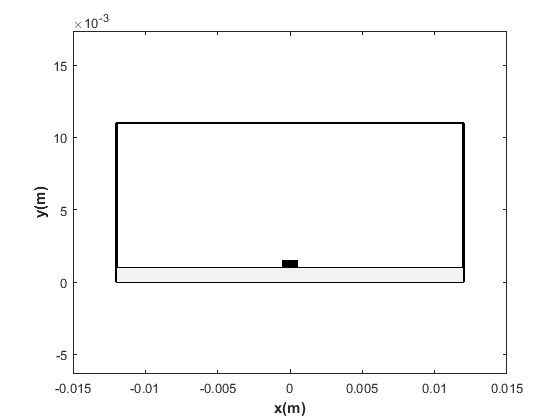

In [3]:
H = h_1 + h_2; % total height of the microstrip
n = 10; %number of samples
dx = 0.05 * cm;
%x = linspace(-l,l,n);
X = -l:dx:l;
Y =  0: dx: H;

plot([X(1),X(1),X(end),X(end),X(1)], ...
     [Y(1),Y(end),Y(end),Y(1),Y(1)],'k', 'linewidth',2)
patch([X(1),X(1),X(end),X(end),X(1)], [Y(1),h_2,h_2,Y(1),Y(1)], [0.95,0.95,0.95])
patch([-W,-W,W,W,-W]/2, [h_2,h_2+T,h_2+T,h_2,h_2], 'k')

axis([X(1)-0.3*cm, X(end)+0.3 *cm, Y(1)-0.3*cm, Y(end)+0.3*cm])
xlabel('x(m)','fontweight','bold')
ylabel('y(m)','fontweight','bold')
axis equal

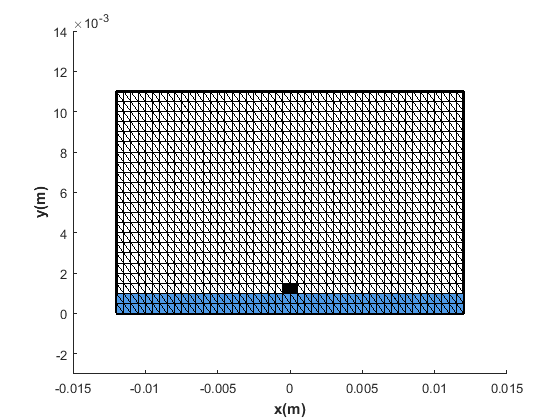

In [5]:
[x,y]=ndgrid(X,Y); % matlab forms χ and у lists
tri = delaunay(x,y);
figure
hold on
plot([X(1),X(1),X(end),X(end),X(1)], ...
     [Y(1),Y(end),Y(end),Y(1),Y(1)],'k', 'linewidth',2)
axis([X(1)-0.3*cm, X(end)+0.3 *cm, Y(1)-0.3*cm, Y(end)+0.3*cm])
tt = [tri, tri(:,1)];
p = [x(:), y(:)];

N=size(p,1);
K=sparse(N,N); 
F=zeros(N,1);


for i = 1:length(tt)

    for j = 1:3               
        pp = [p(tt(i,j),:);p(tt(i,j+1),:)];
        plot(pp(:,1),pp(:,2), 'k')
    end
    
    nodes=tri(i,:);
    P_e=[ones(3,1),p(nodes,:)];
    area=abs(det(P_e))/2;
    C = inv(P_e);
    
    grad=C(2:3,:);
    Ke=area *grad' *grad;
    %Fe=area/3;
    
    %F(nodes)=F(nodes) + Fe;
    
    px = mean(p(tri(i,:),1));
    py = mean(p(tri(i,:),2));
    
    if h_2 + T > py && py > h_2 && abs(px) < (W/2)
         patch(p(tri(i,:),1), p(tri(i,:),2),'k')
         K(nodes,nodes)=K(nodes,nodes) + 0*Ke;
    elseif py < h_2
        patch(p(tri(i,:),1), p(tri(i,:),2),[0.3,0.6,0.9])
        K(nodes,nodes)=K(nodes,nodes) + eps*Ke;
    else
        K(nodes,nodes)=K(nodes,nodes) + epsilon_0*Ke;
    end
end

xlabel('x(m)','fontweight','bold')
ylabel('y(m)','fontweight','bold')

In [12]:
xx = length(X);
yy = length(Y);
ind = reshape(1:xx*yy,xx,yy);
mx_region = (abs(x) <= (W/2 + dx / 100)).*ind;
my_region = (and(y >= h_2 , y <= h_2 + T)).*ind;
m_region = intersect(mx_region,my_region);
m_region = m_region(2:end);
boundary = [1:xx,xx+1:xx:xx*yy,2*xx:xx:xx*yy,xx*yy-xx+2:xx*yy-1];

In [13]:
K(boundary,:)=0;
K(:,boundary)=0;
F(boundary)=0;
K(boundary,boundary)=speye(length(boundary),length(boundary));

V_metal = 5;
F_metal = V_metal*K(:,m_region)*ones(length(m_region),1);

K(m_region,:)=0;
K(:,m_region)=0;
F(m_region)=V_metal;
K(m_region,m_region)=speye(length(m_region),length(m_region));

Kb=K; 
Fb=F - F_metal;
U=Kb\Fb; 

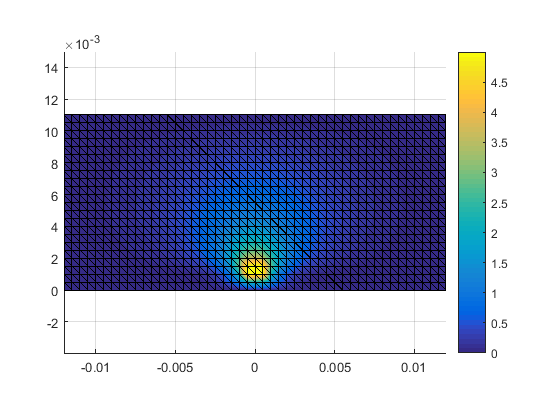

In [14]:
trisurf(tri,p(:,1),p(:,2),0*p(:,1),U,'edgecolor','k','facecolor','interp'); 
view(2),axis equal,colorbar

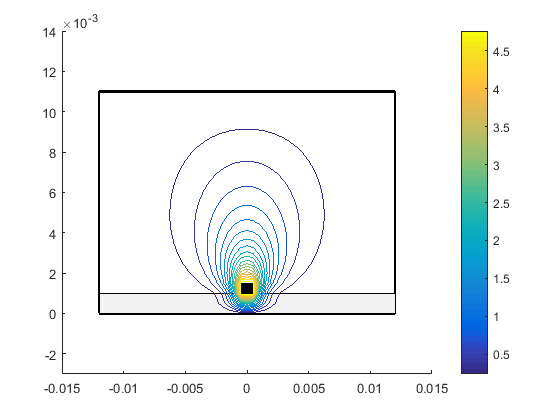

In [23]:
figure
hold on
plot([X(1),X(1),X(end),X(end),X(1)], ...
     [Y(1),Y(end),Y(end),Y(1),Y(1)],'k', 'linewidth',2)
patch([X(1),X(1),X(end),X(end),X(1)], [Y(1),h_2,h_2,Y(1),Y(1)], [0.95,0.95,0.95])
patch([-W,-W,W,W,-W]/2, [h_2,h_2+T,h_2+T,h_2,h_2], 'k')

axis([X(1)-0.3*cm, X(end)+0.3 *cm, Y(1)-0.3*cm, Y(end)+0.3*cm])
potential = reshape(U,xx,yy);
contour(x,y,potential,20);colorbar

# Assignment 2

## Statement of Problem

Find the change in refractive index due to electro-optic(EO) effect for (a) transverse EO modulator of GaAs, (b) Longitudinal EO modulaton of GaAs. 